In [127]:
#Colab에서 구글 드라이브 mount (연결) 하기
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [128]:
#파일 확인하기
!ls "/content/gdrive/My Drive/ml-100k"

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [129]:
#필요한 모듈 import 하기
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [130]:
#판다스를 이용하여 파일 불러오기
train = pd.read_csv("/content/gdrive/My Drive/ml-100k/ua.base",sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/My Drive/ml-100k/ua.test",sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

In [131]:
#pytorch tensor 데이터로 변환
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [132]:
#rank -> 사용자 vector, 아이템 vector의 차원
#numUsers -> 사용자수
#numItems -> 아이템수
#P -> 아이템 매트릭스
#Q -> 사용자 매트릭스
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

In [133]:
#기본 Matrix Factorization 구현
optimizer = torch.optim.Adam([P, Q], lr= 0.1)

for epoch in range(1000):
 hypothesis = torch. sum(P[items] * Q[users], dim= 1)
 cost = F.mse_loss(hypothesis ,ratings)
 
 optimizer.zero_grad()
 cost.backward()
 optimizer.step()
 
 if epoch % 100 == 0:
  print(f"epoch: {epoch}, cost: {cost.item()}")

epoch: 0, cost: 23.400611877441406
epoch: 100, cost: 0.5626345872879028
epoch: 200, cost: 0.493218332529068
epoch: 300, cost: 0.470700740814209
epoch: 400, cost: 0.46009165048599243
epoch: 500, cost: 0.45415636897087097
epoch: 600, cost: 0.4504780173301697
epoch: 700, cost: 0.4480493366718292
epoch: 800, cost: 0.4463284909725189
epoch: 900, cost: 0.4449384808540344


epoch: 0, cost: 23.184282302856445
epoch: 100, cost: 0.5514837503433228
epoch: 200, cost: 0.48751577734947205
epoch: 300, cost: 0.46718332171440125
epoch: 400, cost: 0.45778822898864746
epoch: 500, cost: 0.4524466097354889
epoch: 600, cost: 0.449070006608963
epoch: 700, cost: 0.4466480016708374
epoch: 800, cost: 0.4448135197162628
epoch: 900, cost: 0.4434382915496826


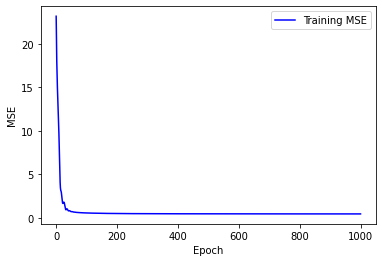

In [134]:
#Matplotlib으로 epoch 마다 Training MSE 그려보기
rank = 10 #사용자 vector, 아이템 vector의 차원
numItems = items.max() + 1  #사용자 수
numUsers = users.max() + 1  #아이템 수
P = torch.randn(numItems, rank, requires_grad=True) #아이템 메트릭스
Q = torch.randn(numUsers, rank, requires_grad=True) #사용자 매트릭스

optimizer = torch.optim.Adam([P, Q], lr= 0.1)
X=[]
Y=[]

for epoch in range(1000):
 hypothesis = torch. sum(P[items] * Q[users], dim= 1)
 cost = F.mse_loss(hypothesis ,ratings)
 
 optimizer.zero_grad()
 cost.backward()
 optimizer.step()

 X.append(epoch)
 Y.append(cost)
 
 if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost: {cost.item()}")

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.legend()
plt.show()

epoch: 0, cost: 23.5538387298584, cost_test: 21.62071418762207
epoch: 100, cost: 0.5618875622749329, cost_test: 1.537969946861267
epoch: 200, cost: 0.49639150500297546, cost_test: 1.9234135150909424
epoch: 300, cost: 0.4744406044483185, cost_test: 2.294003963470459
epoch: 400, cost: 0.46332624554634094, cost_test: 2.6024515628814697
epoch: 500, cost: 0.456718385219574, cost_test: 2.9373419284820557
epoch: 600, cost: 0.4524601101875305, cost_test: 3.32235050201416
epoch: 700, cost: 0.44955748319625854, cost_test: 3.787513256072998
epoch: 800, cost: 0.44742804765701294, cost_test: 4.291371822357178
epoch: 900, cost: 0.44583791494369507, cost_test: 4.839876174926758


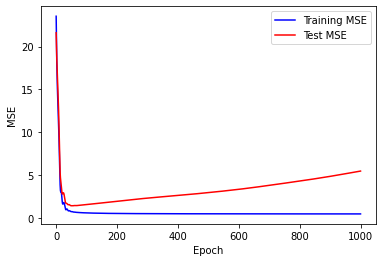

In [135]:
#Matplotlib으로 epoch 마다 Training MSE 그려보기
rank = 10 #사용자 vector, 아이템 vector의 차원
numItems = items.max() + 1  #사용자 수
numUsers = users.max() + 1  #아이템 수
P = torch.randn(numItems, rank, requires_grad=True) #아이템 메트릭스
Q = torch.randn(numUsers, rank, requires_grad=True) #사용자 매트릭스

optimizer = torch.optim.Adam([P, Q], lr= 0.1)
X=[]
Y=[]
Y_test = []

for epoch in range(1000):
 hypothesis = torch. sum(P[items] * Q[users], dim= 1)
 cost = F.mse_loss(hypothesis ,ratings)
 
 optimizer.zero_grad()
 cost.backward()
 optimizer.step()

 X.append(epoch)
 Y.append(cost)

 with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
 
 if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost: {cost.item()}, cost_test: {cost_test.item()}")

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

epoch: 0, cost: 23.79684829711914, cost_test: 21.645910263061523
epoch: 100, cost: 0.7035964131355286, cost_test: 1.0710848569869995
epoch: 200, cost: 0.6427540183067322, cost_test: 1.0664361715316772
epoch: 300, cost: 0.6315580606460571, cost_test: 1.0644240379333496
epoch: 400, cost: 0.6287374496459961, cost_test: 1.0603879690170288
epoch: 500, cost: 0.627763569355011, cost_test: 1.0576807260513306
epoch: 600, cost: 0.6273331642150879, cost_test: 1.0561156272888184
epoch: 700, cost: 0.6270316243171692, cost_test: 1.055248498916626
epoch: 800, cost: 0.6268017888069153, cost_test: 1.054713249206543
epoch: 900, cost: 0.6266564130783081, cost_test: 1.0543116331100464


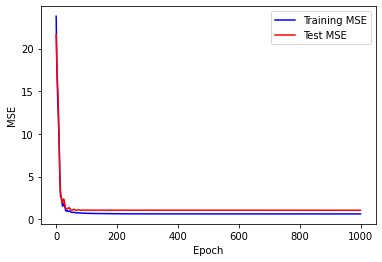

In [136]:
#Regularization 추가하기
rank = 10 #사용자 vector, 아이템 vector의 차원
numItems = items.max() + 1  #사용자 수
numUsers = users.max() + 1  #아이템 수
P = torch.randn(numItems, rank, requires_grad=True) #아이템 메트릭스
Q = torch.randn(numUsers, rank, requires_grad=True) #사용자 매트릭스

optimizer = torch.optim.Adam([P, Q], lr= 0.1)
X=[]
Y=[]
Y_test = []

lambda1 = 0.0001
lambda2 = 0.0001

for epoch in range(1000):
 hypothesis = torch. sum(P[items] * Q[users], dim= 1)
 cost = F.mse_loss(hypothesis ,ratings)
 loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2)
 
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()

 X.append(epoch)
 Y.append(cost)

 with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
 
 if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost: {cost.item()}, cost_test: {cost_test.item()}")

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

epoch: 0, cost: 13.242478370666504, cost_test: 10.038810729980469
epoch: 100, cost: 0.6427234411239624, cost_test: 0.9270590543746948
epoch: 200, cost: 0.6108866333961487, cost_test: 0.9216448664665222
epoch: 300, cost: 0.6053629517555237, cost_test: 0.922014594078064
epoch: 400, cost: 0.604044497013092, cost_test: 0.9203935861587524
epoch: 500, cost: 0.6031213998794556, cost_test: 0.9179200530052185
epoch: 600, cost: 0.6024758815765381, cost_test: 0.9154731035232544
epoch: 700, cost: 0.6022892594337463, cost_test: 0.9145179390907288
epoch: 800, cost: 0.6022173166275024, cost_test: 0.9138944149017334
epoch: 900, cost: 0.6021912693977356, cost_test: 0.9132667779922485


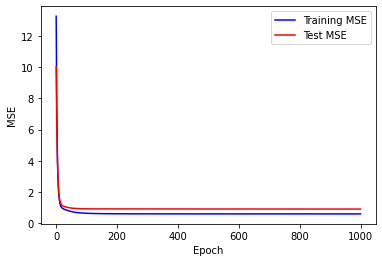

In [137]:
#Bias 추가하기
rank = 10 #사용자 vector, 아이템 vector의 차원
numItems = items.max() + 1  #사용자 수
numUsers = users.max() + 1  #아이템 수
P = torch.randn(numItems, rank, requires_grad=True) #아이템 메트릭스
Q = torch.randn(numUsers, rank, requires_grad=True) #사용자 매트릭스

X=[]
Y=[]
Y_test = []

lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.001
lambda4 = 0.001
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)

for epoch in range(1000):
 hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
 cost = F.mse_loss(hypothesis ,ratings)
 loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)
 
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()

 X.append(epoch)
 Y.append(cost)

 with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + bias_item[items_test] + bias_user[users_test] + mean
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
 
 if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost: {cost.item()}, cost_test: {cost_test.item()}")

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

epoch: 0, cost: 12.739885330200195, cost_test: 9.457426071166992
epoch: 100, cost: 0.9421330690383911, cost_test: 1.0141730308532715
epoch: 200, cost: 0.9420610666275024, cost_test: 1.014072060585022
epoch: 300, cost: 0.9420603513717651, cost_test: 1.014072299003601
epoch: 400, cost: 0.9420602917671204, cost_test: 1.014072299003601
epoch: 500, cost: 0.9420602917671204, cost_test: 1.0140721797943115
epoch: 600, cost: 0.9420603513717651, cost_test: 1.014072299003601
epoch: 700, cost: 0.9420593976974487, cost_test: 1.01406991481781
epoch: 800, cost: 0.9420603513717651, cost_test: 1.0140721797943115
epoch: 900, cost: 0.942061722278595, cost_test: 1.0140661001205444


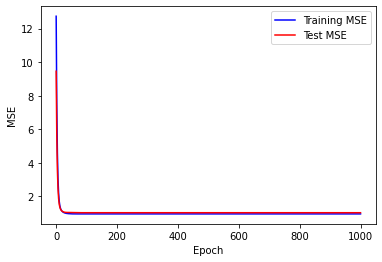

In [138]:
#lambda1 또는 lambda2를 더 크게 설정해주면 두 그래프가 더 가까워진다.
rank = 10 #사용자 vector, 아이템 vector의 차원
numItems = items.max() + 1  #사용자 수
numUsers = users.max() + 1  #아이템 수
P = torch.randn(numItems, rank, requires_grad=True) #아이템 메트릭스
Q = torch.randn(numUsers, rank, requires_grad=True) #사용자 매트릭스

X=[]
Y=[]
Y_test = []

lambda1 = 0.1
lambda2 = 0.1
lambda3 = 0.001
lambda4 = 0.001
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)

for epoch in range(1000):
 hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
 cost = F.mse_loss(hypothesis ,ratings)
 loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)
 
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()

 X.append(epoch)
 Y.append(cost)

 with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + bias_item[items_test] + bias_user[users_test] + mean
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
 
 if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost: {cost.item()}, cost_test: {cost_test.item()}")

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

epoch: 0, cost: 12.851186752319336, cost_test: 10.269216537475586
epoch: 100, cost: 0.5145924091339111, cost_test: 1.5161731243133545
epoch: 200, cost: 0.46522894501686096, cost_test: 1.6165274381637573
epoch: 300, cost: 0.4535410702228546, cost_test: 1.6905235052108765
epoch: 400, cost: 0.4482494592666626, cost_test: 1.8188196420669556
epoch: 500, cost: 0.4458029270172119, cost_test: 1.8803471326828003
epoch: 600, cost: 0.4444238245487213, cost_test: 1.904944896697998
epoch: 700, cost: 0.4433273375034332, cost_test: 1.928979754447937
epoch: 800, cost: 0.4422505497932434, cost_test: 1.9618682861328125
epoch: 900, cost: 0.44134995341300964, cost_test: 1.999229907989502


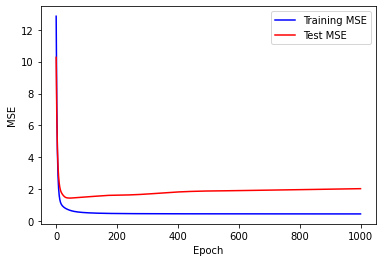

In [141]:
#lambda1 또는 lambda2를 더 작게 설정해주면 두 그래프가 더 멀어진다.
rank = 10 #사용자 vector, 아이템 vector의 차원
numItems = items.max() + 1  #사용자 수
numUsers = users.max() + 1  #아이템 수
P = torch.randn(numItems, rank, requires_grad=True) #아이템 메트릭스
Q = torch.randn(numUsers, rank, requires_grad=True) #사용자 매트릭스

X=[]
Y=[]
Y_test = []

lambda1 = 0.000001
lambda2 = 0.000001
lambda3 = 0.001
lambda4 = 0.001
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)

for epoch in range(1000):
 hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
 cost = F.mse_loss(hypothesis ,ratings)
 loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)
 
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()

 X.append(epoch)
 Y.append(cost)

 with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + bias_item[items_test] + bias_user[users_test] + mean
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
 
 if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost: {cost.item()}, cost_test: {cost_test.item()}")

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

epoch: 0, cost: 13.04130744934082, cost_test: 10.075299263000488
epoch: 100, cost: 0.6425337791442871, cost_test: 0.9339807629585266
epoch: 200, cost: 0.6156651973724365, cost_test: 0.9257555603981018
epoch: 300, cost: 0.6116239428520203, cost_test: 0.9248688817024231
epoch: 400, cost: 0.6105525493621826, cost_test: 0.9223416447639465
epoch: 500, cost: 0.6100525856018066, cost_test: 0.9202959537506104
epoch: 600, cost: 0.609874963760376, cost_test: 0.9188601970672607
epoch: 700, cost: 0.6098685264587402, cost_test: 0.9183436632156372
epoch: 800, cost: 0.609887957572937, cost_test: 0.918538510799408
epoch: 900, cost: 0.6097555160522461, cost_test: 0.9196316003799438


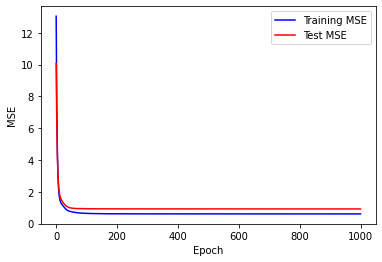

In [140]:
#lambda3 또는 lambda4를 더 크게 설정해주면 두 그래프가 기존과 유의미한 차이가 없다.
#더 작게 설정해줘도 마찬가지로 유의미한 차이가 없다.
rank = 10 #사용자 vector, 아이템 vector의 차원
numItems = items.max() + 1  #사용자 수
numUsers = users.max() + 1  #아이템 수
P = torch.randn(numItems, rank, requires_grad=True) #아이템 메트릭스
Q = torch.randn(numUsers, rank, requires_grad=True) #사용자 매트릭스

X=[]
Y=[]
Y_test = []

lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.1
lambda4 = 0.1
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()

optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)

for epoch in range(1000):
 hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
 cost = F.mse_loss(hypothesis ,ratings)
 loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)
 
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()

 X.append(epoch)
 Y.append(cost)

 with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + bias_item[items_test] + bias_user[users_test] + mean
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test)
 
 if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost: {cost.item()}, cost_test: {cost_test.item()}")

plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.plot(X,Y_test, c="red", label="Test MSE")
plt.legend()
plt.show()